# Analisi dati Incidenti in Italia

In questo progetto abbiamo analizzato statisticamente i dati sugli incidenti in Italia nell'anno 2017. 

Le fonti dei dati sono:
* Microdati dell'**ISTAT** su tutta la popolazione di incidenti in Italia nel 2017.
* Microdati sulle patenti italiane forniti dal **Ministero delle Infrastrutture e dei Trasporti**, riferiti alla data 26/05/2017 
* Dati tabulati dell'**ISTAT** per la popolazione Italiana per regione, 2019.

Tutta l'analisi parte come base dai dati sugli incidenti e usa le altre fonti per eseguire confronti su popolazione.

Si noti che, per i casi considerati in questa analisi, si identifica come **incidente** un qualsiasi evento che coinvolga almeno un veicolo autostradale e comporti la presenza di almeno un ferito e/o morto.

Al fine di eseguire un'*analisi campionaria*, abbiamo considerato un campione di grandezza `SAMPLE_SIZE`.

------

In [1]:
dataset_proj <- read.csv("dataset/dataset progetto.csv", sep=';')

In [2]:
cat("Grandezza del dataset:",ncol(dataset_proj),"x",nrow(dataset_proj))

Grandezza del dataset: 117 x 174933

Andiamo a prendere un campione di dal dataset che viene fornito. Per modificare la grandezza del campione, si cambi `SAMPLE_SIZE`.

In [3]:
SAMPLE_SIZE = 20000
sample_rows <- sample(nrow(dataset_proj), SAMPLE_SIZE)
sample_data = dataset_proj[sample_rows,]
attach(sample_data)

## 1. Analisi Descrittiva Univariata

**NOTA** Sarebbe interessante confrontare questi dati con quelli del traffico in Italia, e vedere effettivamente come ci sia una correlazione lineare tra numero di auto in strada e numero di incidenti per ora.

### 1.1 Orari più pericolosi

Analizziamo i dati forniti per individuare quale sia l'orario più pericoloso.

In [4]:
incidenti_per_Ora <- factor(Ora)
levels(incidenti_per_Ora) <- c("00","01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23","NS")

In [5]:
incidenti_per_Ora.freq <- table(incidenti_per_Ora)
incidenti_per_Ora.relfreq <- incidenti_per_Ora.freq/SAMPLE_SIZE
incidenti_per_Ora.percfreq <- incidenti_per_Ora.relfreq*100

Le freq. ASSOLUTE sono:  376 274 214 162 162 230 371 967 1320 1186 1230 1267 1275 1193 1153 1215 1284 1628 1448 1090 686 476 398 347 48 

Le freq. RELATIVE sono:  0.0188 0.0137 0.0107 0.0081 0.0081 0.0115 0.01855 0.04835 0.066 0.0593 0.0615 0.06335 0.06375 0.05965 0.05765 0.06075 0.0642 0.0814 0.0724 0.0545 0.0343 0.0238 0.0199 0.01735 0.0024 

Le freq. PERCENTUALI sono:  1.88 1.37 1.07 0.81 0.81 1.15 1.855 4.835 6.6 5.93 6.15 6.335 6.375 5.965 5.765 6.075 6.42 8.14 7.24 5.45 3.43 2.38 1.99 1.735 0.24

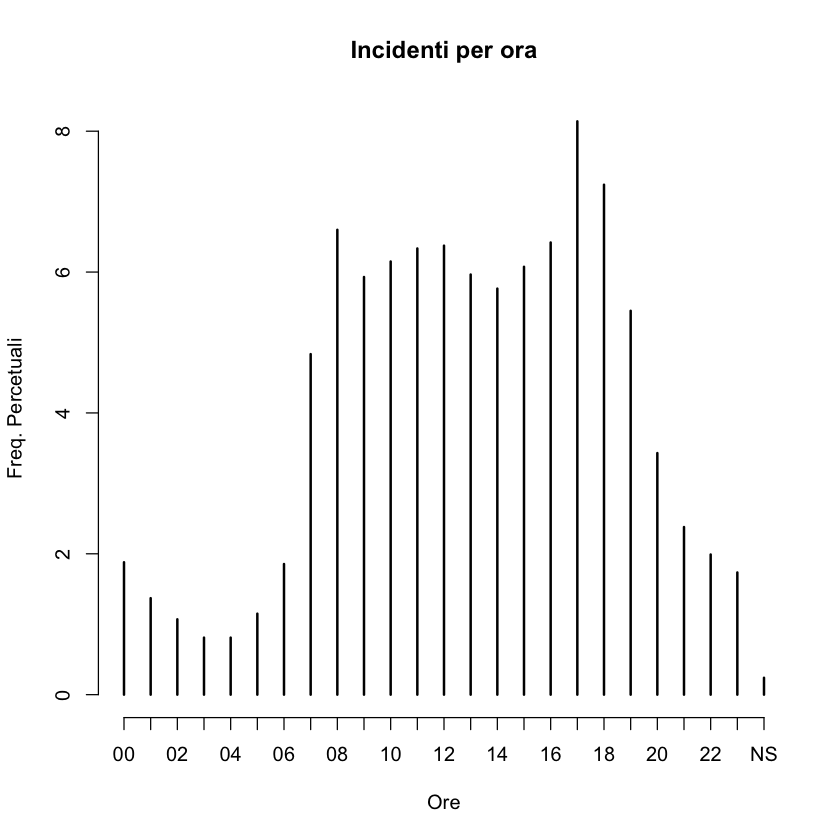

In [6]:
cat("Le freq. ASSOLUTE sono: ",incidenti_per_Ora.freq,"\n\n")
cat("Le freq. RELATIVE sono: ",incidenti_per_Ora.relfreq,"\n\n")
cat("Le freq. PERCENTUALI sono: ",incidenti_per_Ora.percfreq)
#drop della colonna in cui non è stata specificata l'ora
#incidenti_per_Ora.freq <- incidenti_per_Ora.freq[-c(25)] 
plot(incidenti_per_Ora.percfreq,xlab = "Ore",ylab = "Freq. Percetuali", main='Incidenti per ora')

In [7]:
pdf("results/incidenti_per_ora.pdf")
plot(incidenti_per_Ora.percfreq,xlab = "Ore",ylab = "Freq. Percetuali", main='Incidenti per ora')
dev.off()

pdf 
  2

In [8]:
moda_incidenti_per_Ora <- which(incidenti_per_Ora.percfreq==max(incidenti_per_Ora.percfreq))
cat("L'orario con più incidenti è quello delle: ", names(moda_incidenti_per_Ora))

L'orario con più incidenti è quello delle:  17

Da questa analisi, si nota come la concentrazione degli incidenti, come ci si potrebbe aspettare, coincide con le ore di punta. In particolare, gli orari 17 e 18 risultano quelli con più incidenti nel corso della giornata. 

L'ora in assoluto che presenta più incidenti è quella delle 18.

### 2.1 Incidenti città metropolitane

Ci siamo proposti di analizzare quale tra le 5 maggiori province con aree metropolitane, ovvero Torino, Roma, Milano, Genova e Napoli, abbia un maggior numero di incidenti. In particolare, andiamo a calcolare l'eterogeneità (o meno) di queste misure.

In [9]:
incidenti_per_provincia <- factor(provincia)
incidenti_per_provincia <- table(incidenti_per_provincia)

In [10]:
#1:torino,10:Genova,15:Milano,58:Roma,63:Napoli
incidenti_per_provinciaRidotta <- incidenti_per_provincia[c(1,10,15,58,63)]
#NON SO PER QUALE MOTIVO NON RIESCO AD USARE LEVELS PER SETTARE IL NOME DELLE COLONNE...
names(incidenti_per_provinciaRidotta)[c(1,2,3,4,5)]<-c("TORINO","GENOVA","MILANO","ROMA","NAPOLI")
incidenti_per_provinciaRidotta

TORINO GENOVA MILANO   ROMA NAPOLI 
   646    580   1606   1887    567 

TORINO GENOVA MILANO   ROMA NAPOLI 
 3.230  2.900  8.030  9.435  2.835 

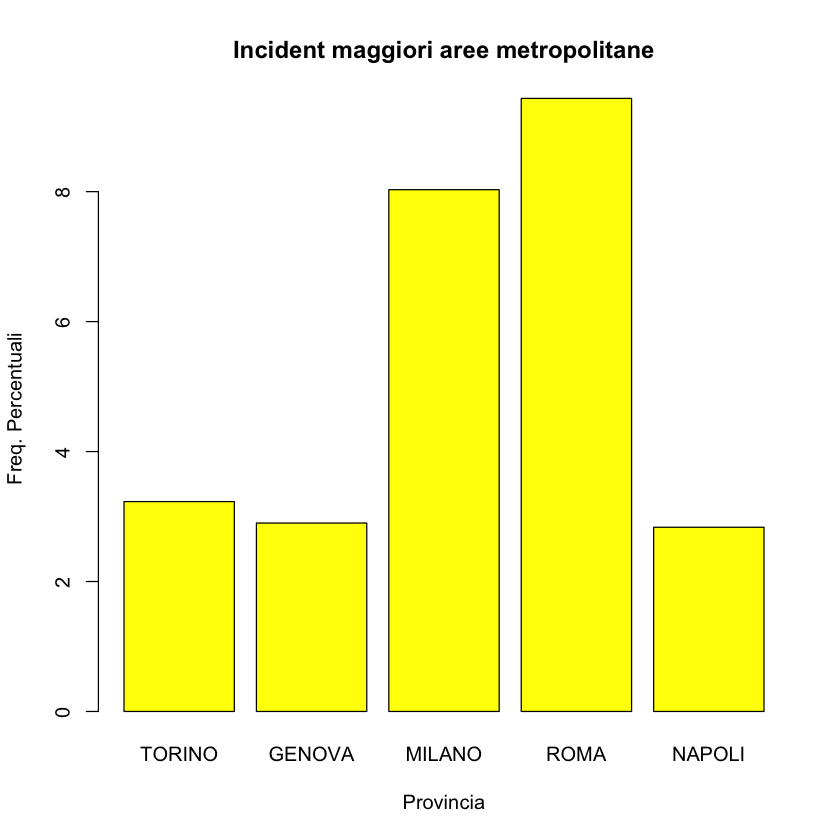

In [11]:
incidenti_per_provinciaR.freq <- incidenti_per_provinciaRidotta
incidenti_per_provinciaR.relfreq <- incidenti_per_provinciaRidotta/SAMPLE_SIZE
incidenti_per_provinciaR.percfreq <- incidenti_per_provinciaR.relfreq*100
incidenti_per_provinciaR.percfreq
barplot(incidenti_per_provinciaR.percfreq,col = "yellow",xlab = "Provincia",ylab = "Freq. Percentuali",
       main="Incident maggiori aree metropolitane")

In [12]:
#CALCOLO COSE "RIDONDATI" PER AVER MATERIALE DA METTERE NELLA RELAZIONE
moda_incidenti_per_provinciaR <- which(incidenti_per_provinciaR.percfreq==max(incidenti_per_provinciaR.percfreq))
cat("La provincia tra quelle mostrate con più incidenti è quella di ",names(moda_incidenti_per_provinciaR))

La provincia tra quelle mostrate con più incidenti è quella di  ROMA

In [13]:
indice_eterogeneitaGiniNorm <- function(freqRel,k){
    x=0
    for(i in freqRel){
        x=x+i^2
    }
    z = (1-x)*(k)/(k-1)
    z
}

In [14]:
incidenti_per_provincia.relfreq <- incidenti_per_provincia/SAMPLE_SIZE
x=0
#length(incidenti_per_provincia.relfreq)==length(incidenti_per_provincia)
Gnorm <- indice_eterogeneitaGiniNorm(incidenti_per_provincia.relfreq,length(incidenti_per_provincia))
cat("Gnorm = ",Gnorm," un valore vicino alla massima eterogeneità")

Gnorm =  0.982877  un valore vicino alla massima eterogeneità

Una prima analisi, senza considerazione di popolazione, mostra come la città con il maggior numero di incidenti sia **Roma**. Di seguito viene mostrata la stessa analisi, ma pesata sul numero di abitanti.

In [15]:
#Mantengo lo stesso ordine presente nella tabella con le frequenze.
popolazione_maggiori_province = c(2259523,841180,3250315, 4342212, 3084890)

In [18]:
incidenti_per_provinciaR.per_abitante = array(0,5)
for(i in 1:length(incidenti_per_provinciaR.relfreq))
{
        incidenti_per_provinciaR.per_abitante[i] =  100000 * incidenti_per_provinciaR.relfreq[i] * nrow(dataset_proj) / popolazione_maggiori_province[i]
}
#incidenti_per_provinciaR.per_abitante = table(incidenti_per_provinciaR.per_abitante)
names(incidenti_per_provinciaR.per_abitante) = c("TORINO","GENOVA","MILANO","ROMA","NAPOLI")

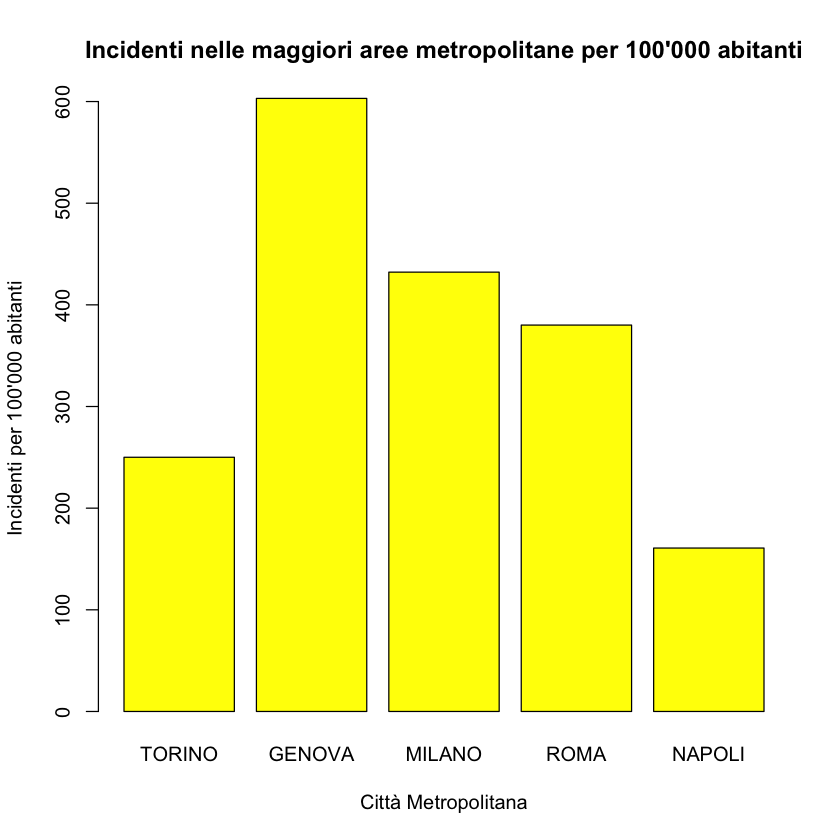

In [32]:
barplot(incidenti_per_provinciaR.per_abitante,col = "yellow",xlab = "Città Metropolitana",ylab = "Incidenti per 100'000 abitanti", main="Incidenti nelle maggiori aree metropolitane per 100'000 abitanti")

In [33]:
cat("La provincia tra quelle mostrate con più incidenti per 100'000 abitanti è quella di ",names(which(incidenti_per_provinciaR.per_abitante==max(incidenti_per_provinciaR.per_abitante))))

La provincia tra quelle mostrate con più incidenti per 100'000 abitanti è quella di  GENOVA

In [37]:
total_fre_per_abitante = sum(incidenti_per_provinciaR.per_abitante)

In [38]:
x=0
Gnorm <- indice_eterogeneitaGiniNorm(incidenti_per_provinciaR.per_abitante/total_fre_per_abitante,5)
cat("Gnorm = ",Gnorm," un valore vicino alla massima eterogeneità")

Gnorm =  0.956391  un valore vicino alla massima eterogeneità

Da questa analisi si mostra come, sebbene Roma sia la città metropolitana che presenta in totale il maggior numero di incidenti, è Genova la città che, per numero di abitanti, ha più incidenti. In particolare, tra quelle analizzate, Napoli è la città col minor numero di incidenti, sia in assoluto che sugli abitanti.